### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

### Load the dataset

In [2]:
train = pd.read_csv(r'C:\Users\LENOVO\Desktop\DSA\datasets\train.csv')
test = pd.read_csv(r'C:\Users\LENOVO\Desktop\DSA\datasets\test.csv')

### Exploratory data Analysis

In [3]:
#view the first few entries of training data
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#view the first few entries of test data
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
#Print the number of rows and columns of the dataset
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


In [6]:
#statistical analysis
# train data
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
#statistical analysis
# test data
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [8]:
## Checking the datatypes of dataset
# train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
## Checking the datatypes of dataset
# train data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [10]:
## count number of missing values
# train data
print(train.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [11]:
## count number of missing values
# test data
print(test.isnull().sum())

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [12]:
print(train['Gender'].value_counts())
print(test['Gender'].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64
Male      286
Female     70
Name: Gender, dtype: int64


In [13]:
print(train['Married'].value_counts())
print(test['Married'].value_counts())

Yes    398
No     213
Name: Married, dtype: int64
Yes    233
No     134
Name: Married, dtype: int64


In [14]:
print(train['Dependents'].value_counts())
print(test['Dependents'].value_counts())

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64


In [14]:
print(train['Education'].value_counts())
print(test['Education'].value_counts())

Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Graduate        283
Not Graduate     84
Name: Education, dtype: int64


In [15]:
print(train['Self_Employed'].value_counts())
print(test['Self_Employed'].value_counts())

No     500
Yes     82
Name: Self_Employed, dtype: int64
No     307
Yes     37
Name: Self_Employed, dtype: int64


In [16]:
print(train['Loan_Amount_Term'].value_counts())
print(test['Loan_Amount_Term'].value_counts())

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64


In [17]:
print(train['Credit_History'].value_counts())
print(test['Credit_History'].value_counts())

1.0    475
0.0     89
Name: Credit_History, dtype: int64
1.0    279
0.0     59
Name: Credit_History, dtype: int64


### Data visualisation

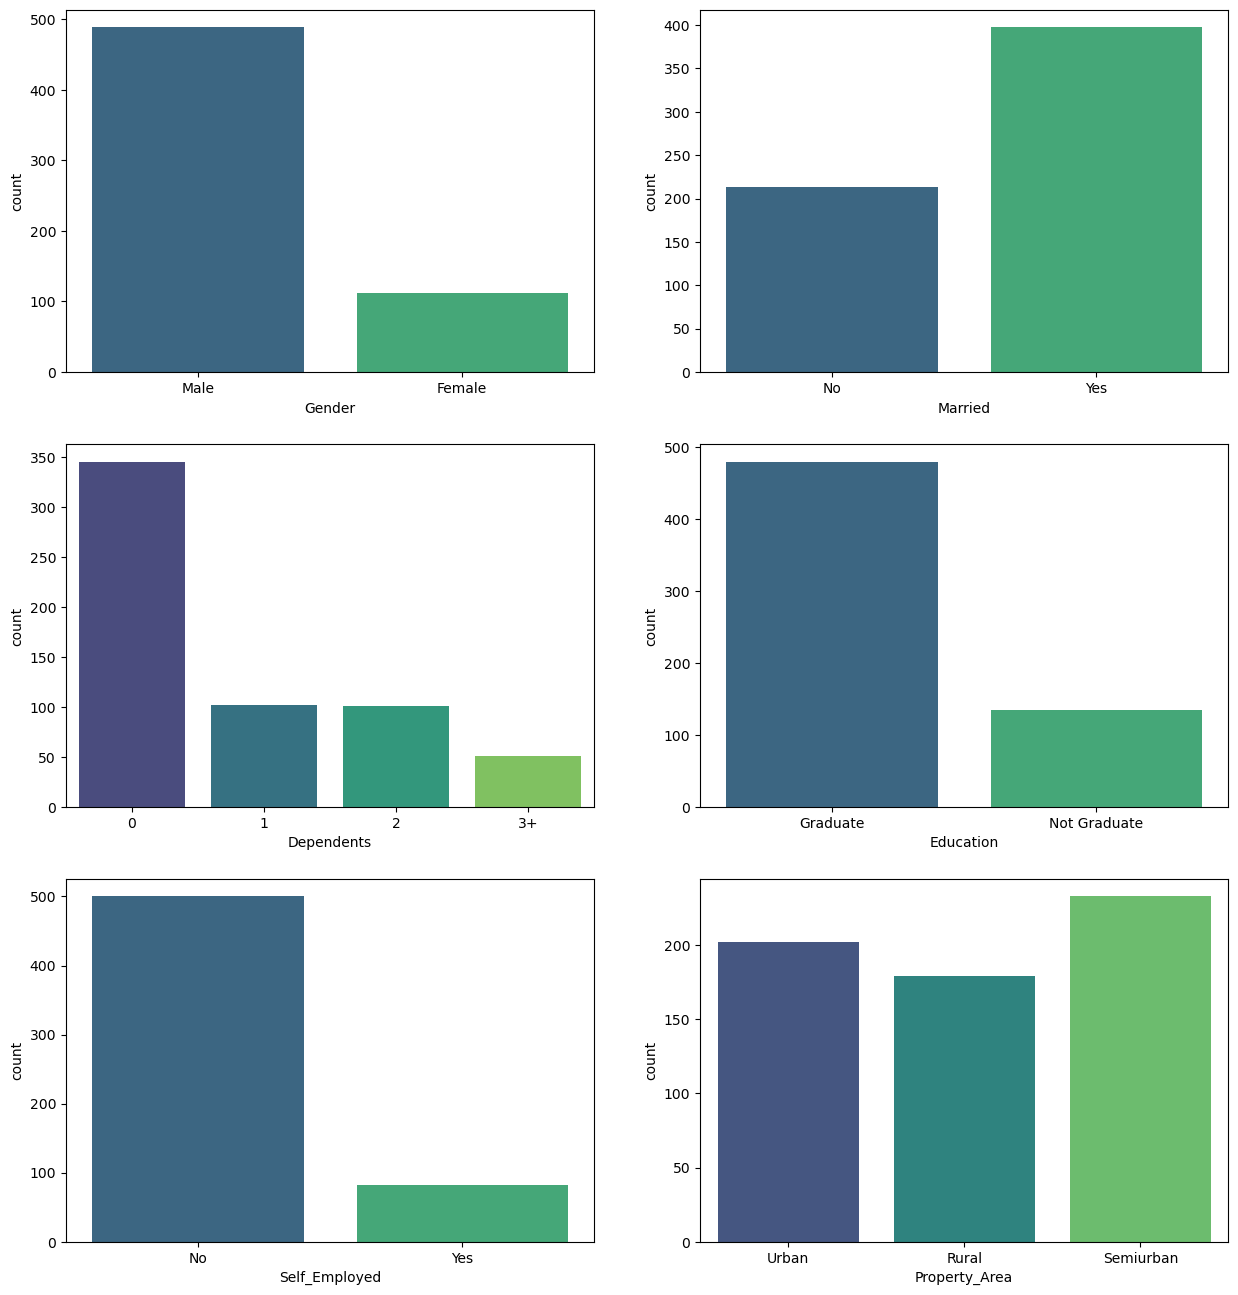

In [18]:
## count plot of training data

fig, ax = plt.subplots(3, 2, figsize = (15,16))
sns.countplot(x='Gender', data=train,ax=ax[0,0], palette='viridis' )  
sns.countplot(x='Married', data=train, ax=ax[0,1], palette='viridis')
sns.countplot(x='Dependents', data=train,ax=ax[1,0], palette='viridis' )
sns.countplot(x='Education', data=train,ax=ax[1,1], palette='viridis' )  
sns.countplot(x='Self_Employed', data=train, ax=ax[2,0], palette='viridis')
sns.countplot(x='Property_Area', data=train,ax=ax[2,1], palette='viridis' )

plt.show()

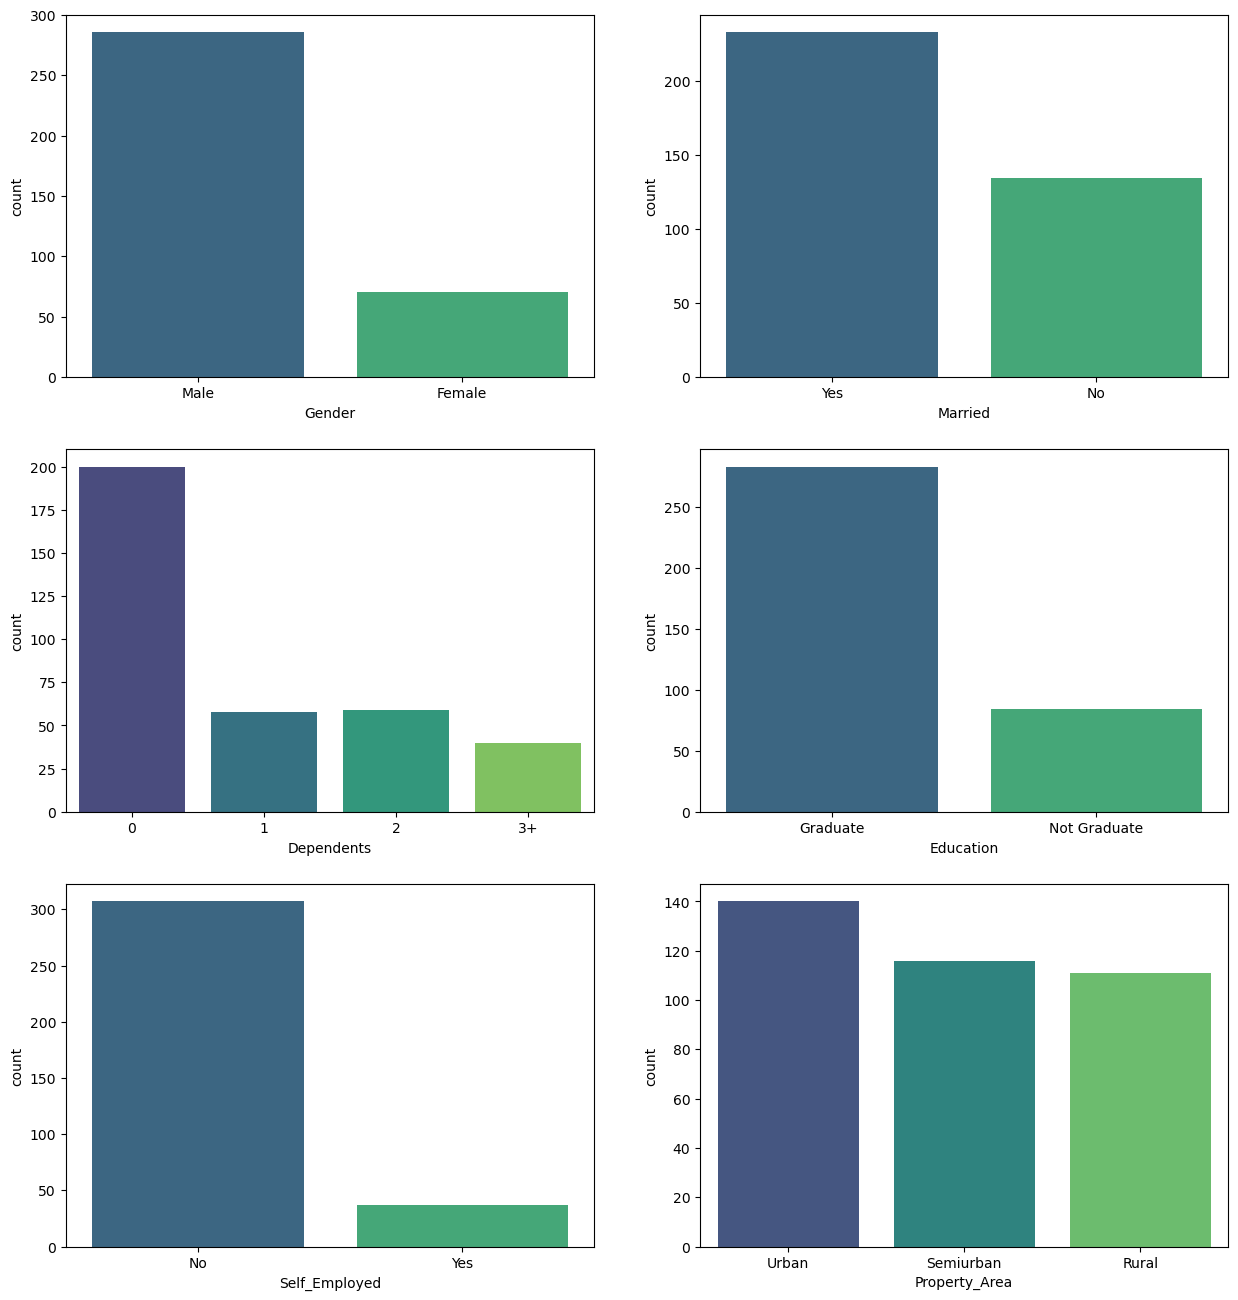

In [20]:
## count plot of test data

fig, ax = plt.subplots(3, 2, figsize = (15,16))
sns.countplot(x='Gender', data=test,ax=ax[0,0], palette='viridis' )  
sns.countplot(x='Married', data=test, ax=ax[0,1], palette='viridis')
sns.countplot(x='Dependents', data=test,ax=ax[1,0], palette='viridis' )
sns.countplot(x='Education', data=test,ax=ax[1,1], palette='viridis' )  
sns.countplot(x='Self_Employed', data=test, ax=ax[2,0], palette='viridis')
sns.countplot(x='Property_Area', data=test,ax=ax[2,1], palette='viridis' )

plt.show()

<Axes: xlabel='Loan_Status', ylabel='count'>

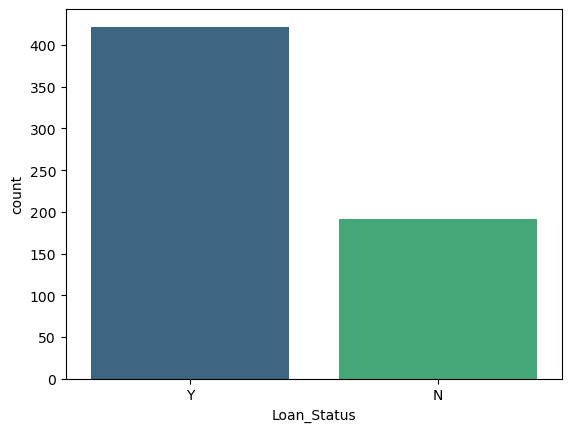

In [19]:
sns.countplot(x='Loan_Status',data=train,palette='viridis')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10632\3894389604.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), cmap='viridis', annot=True)


<Axes: >

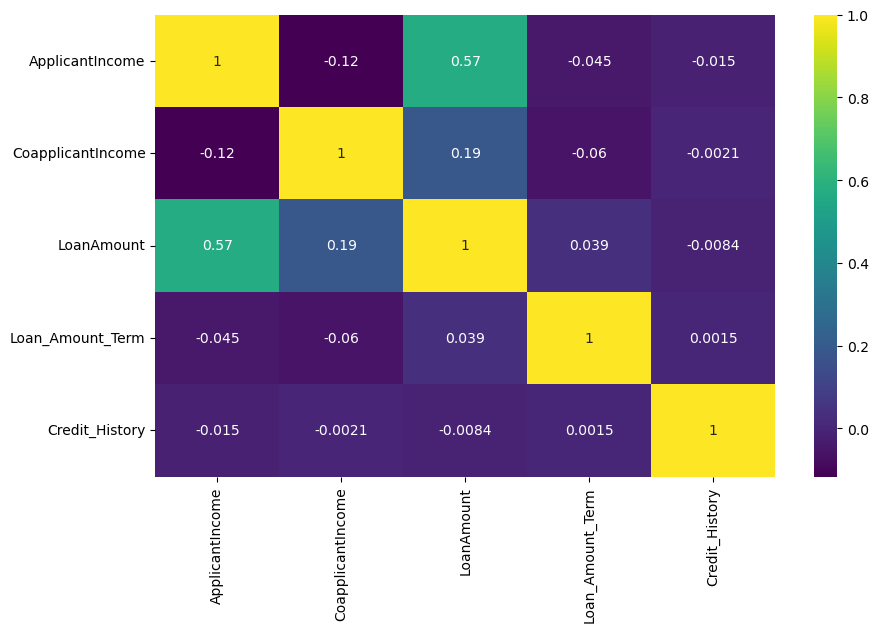

In [20]:
plt.figure(figsize = (10,6))
sns.heatmap(train.corr(), cmap='viridis', annot=True)

### Data preprocessing

In [21]:
## Fill the missing values in the train data

train['Gender'] = train['Gender'].fillna('Male')
train['Married'] = train['Married'].fillna('Yes')
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed'] = train['Self_Employed'].fillna('No')
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0])
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mode()[0])

In [22]:
## count number of missing values
print(train.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [23]:
## Fill the missing values in the test data

test['Gender'] = test['Gender'].fillna('Male')
test['Dependents'] = test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed'] = test['Self_Employed'].fillna('No')
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].mean())
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0])
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mode()[0])

In [24]:
## count number of missing values
print(test.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [25]:
## Changing the datatypes of Loan_Amount_term column
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].astype('int64')
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].astype('int64')

In [26]:
# Removing the '+' sign from Dependents column
train['Dependents'] = train['Dependents'].str.rstrip('+')
test['Dependents'] = test['Dependents'].str.rstrip('+')

In [27]:
## Changing the datatypes of Dependents column
train['Dependents'] = train['Dependents'].astype('int64')
test['Dependents'] = test['Dependents'].astype('int64')

In [28]:
train['Loan_ID'] = train['Loan_ID'].apply(str).str.replace('LP00','0')
test['Loan_ID'] = test['Loan_ID'].apply(str).str.replace('LP00','0')

In [54]:
## Imputing categorical column

In [29]:
## Assigning numerical values to Gender,Married,Education,self_employed categories

train['Gender'] = train['Gender'].map({'Male': 1, 'Female': 0})
train['Married'] = train['Married'].map({'No' : 0, 'Yes': 1})
train['Education'] = train['Education'].map({'Graduate' : 1, 'Not Graduate' : 0})
train['Self_Employed'] = train['Self_Employed'].map({'No' : 0, 'Yes' : 1})

In [30]:
test['Gender'] = test['Gender'].map({'Male': 1, 'Female': 0})
test['Married'] = test['Married'].map({'No' : 0, 'Yes': 1})
test['Education'] = test['Education'].map({'Graduate' : 1, 'Not Graduate' : 0})
test['Self_Employed'] = test['Self_Employed'].map({'No' : 0, 'Yes' : 1})

In [31]:
## creating dummy variables for property column

property_area = pd.get_dummies(train['Property_Area'], prefix='Property_Area')
train = pd.concat([train, property_area], axis = 1)
train = train.drop('Property_Area', axis = 1)

property_area = pd.get_dummies(test['Property_Area'], prefix='Property_Area')
test = pd.concat([test, property_area], axis = 1)
test = test.drop('Property_Area', axis = 1)

In [58]:
## feature scaling

In [32]:
# Scale the input features

scaler = StandardScaler()
train['Loan_ID'] = scaler.fit_transform(train['Loan_ID'].values.reshape(-1, 1))
test['Loan_ID'] = scaler.transform(test['Loan_ID'].values.reshape(-1, 1))

In [33]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for col in numerical_cols:
    train[col] = scaler.fit_transform(train[col].values.reshape(-1, 1))
    test[col] = scaler.transform(test[col].values.reshape(-1, 1))

In [35]:
X = train.drop('Loan_Status', axis = 1)
y = train['Loan_Status']
test_val = test

In [36]:
print(X.shape, y.shape)

(614, 14) (614,)


In [54]:
test.shape

(367, 14)

In [37]:
#Splitting the dataset into train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(491, 14) (123, 14) (491,) (123,)


### SVM Classifier

In [38]:
# Create SVM Classifier
svc_classifier = SVC()

# train the model using the training sets
svc_classifier.fit(X_train, y_train)

# make predictions on the testing set
svc_predictions = svc_classifier.predict(X_test)

In [39]:
# evaluate the model
svc_accuracy = accuracy_score(y_test, svc_predictions)
conf_matrix = confusion_matrix(y_test, svc_predictions)
classification_rep = classification_report(y_test, svc_predictions)

print(f'Accuracy: {svc_accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.79
Confusion Matrix:
[[18 25]
 [ 1 79]]
Classification Report:
              precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



### KNN Classifier

In [41]:
# Create KNN Classifier
knn_classifier = KNeighborsClassifier()

# train the model using the training sets
knn_classifier.fit(X_train, y_train)

# make predictions on the testing set
knn_predictions = knn_classifier.predict(X_test)

In [42]:
# evaluate the model
knn_accuracy = accuracy_score(y_test, knn_predictions)
conf_matrix = confusion_matrix(y_test, knn_predictions)
classification_rep = classification_report(y_test, knn_predictions)

print(f'Accuracy: {knn_accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.72
Confusion Matrix:
[[ 8 35]
 [ 0 80]]
Classification Report:
              precision    recall  f1-score   support

           N       1.00      0.19      0.31        43
           Y       0.70      1.00      0.82        80

    accuracy                           0.72       123
   macro avg       0.85      0.59      0.57       123
weighted avg       0.80      0.72      0.64       123



### Decision tree classifier

In [44]:
# Create decision tree Classifier
dt_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# train the model using the training sets
dt_classifier.fit(X_train, y_train)

# make predictions on the testing set
dt_predictions = dt_classifier.predict(X_test)

In [45]:
# evaluate the model
dt_accuracy = accuracy_score(y_test, dt_predictions)
conf_matrix = confusion_matrix(y_test, dt_predictions)
classification_rep = classification_report(y_test, dt_predictions)

print(f'Accuracy: {dt_accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.79
Confusion Matrix:
[[18 25]
 [ 1 79]]
Classification Report:
              precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



### Random forest classifier

In [46]:
# Create Random forest Classifier
rf_classifier = RandomForestClassifier()

# train the model using the training sets
rf_classifier.fit(X_train, y_train)

# make predictions on the testing set
rf_predictions = rf_classifier.predict(X_test)

In [47]:
# evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
conf_matrix = confusion_matrix(y_test, rf_predictions)
classification_rep = classification_report(y_test, rf_predictions)

print(f'Accuracy: {rf_accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.77
Confusion Matrix:
[[18 25]
 [ 3 77]]
Classification Report:
              precision    recall  f1-score   support

           N       0.86      0.42      0.56        43
           Y       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123



### Logistic Regression

In [48]:
# Create Logistic regression Classifier
lr_classifier = LogisticRegression(solver='liblinear')

# train the model using the training sets
lr_classifier.fit(X_train, y_train)

# make predictions on the testing set
lr_predictions = lr_classifier.predict(X_test)

In [49]:
# evaluate the model
lr_accuracy = accuracy_score(y_test, lr_predictions)
conf_matrix = confusion_matrix(y_test, lr_predictions)
classification_rep = classification_report(y_test, lr_predictions)

print(f'Accuracy: {lr_accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.79
Confusion Matrix:
[[18 25]
 [ 1 79]]
Classification Report:
              precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [50]:
print(f'SVM_Accuracy: {svc_accuracy:.2f}')
print(f'KNN_Accuracy: {knn_accuracy:.2f}')
print(f'Decision tree_Accuracy: {dt_accuracy:.2f}')
print(f'Random forest_Accuracy: {rf_accuracy:.2f}')
print(f'Logistic regression_Accuracy: {lr_accuracy:.2f}')

SVM_Accuracy: 0.79
KNN_Accuracy: 0.72
Decision tree_Accuracy: 0.79
Random forest_Accuracy: 0.77
Logistic regression_Accuracy: 0.79


Models with best accuracy are SVM, Decision tree and Random forest

In [59]:
# Predicting the test data

pred = svc_classifier.predict(test)

In [61]:
test.shape

(367, 14)

In [51]:
test_df = pd.read_csv(r'C:\Users\LENOVO\Desktop\DSA\datasets\test.csv')
result = pd.read_csv(r'C:\Users\LENOVO\Desktop\DSA\datasets\sample_submission.csv')

result['Loan_ID'] = test_df['Loan_ID']

In [64]:
result['Loan_Status'] = pred
result.to_csv('sample_submission.csv', index=False)

In [65]:
result['Loan_Status'] = result['Loan_Status'].map({1: 'Y', 0: 'N'})